# Final, Mathieu Rundstrom

# 1. Analysis of the membership of $f_a$ into the scale $C_k,\alpha([−1,1])$.
We first analyze the condition of $f_a\in C^k([-1,1])$. We compute the $k$th derivative of $f_a$ .

$$
f_a^{(k)}(x) = a(a-1)\dots (a-k+1)x^{a-k}I_{]0,1]}
$$

Where $I$ is the indicator function. Thus, clearly $f_a^{(k)}(0) = 0$. For this $k$th derivative to be continuous, we require that $a-k> 0$. Thus, the maximum value of $k$ is the biggest integer $k$ s.t. $k<a$. Expressed explicitly

$$
k = \begin{cases}
a-1 & a\in \mathbb{N}\\
\lfloor a \rfloor & otherwise
\end{cases}
$$


We now analyze the condition of $f_a \in C^{0, \alpha}([−1,1])$. Suppose $x\leq0$, then $f(x) = 0$. Hence, wlog, the following analysis holds. We have for $\alpha \leq a$

\begin{align*}
\sup\limits_{-1\leq x, y\leq 1} \frac{\left|f_{a}(x) - f_{a}(y)\right|}{|x - y|^{\alpha}} &= \sup_{-1\leq x, y\leq 1} \frac{\left|x^a - y^a\right|}{|x - y|^{\alpha}}\\
&\leq \sup\limits_{-1\leq x, y\leq 1} \frac{\left|x - y\right|^a}{|x - y|^{\alpha}}\\
&= \sup\limits_{-1\leq x, y\leq 1} |x - y|^{a -\alpha}\\
&\leq 2^{a -\alpha}<\infty
\end{align*}

Hence, $f_{a} \in C^{k}([-1,1])$ and $f_{a}^{k} \in C^{0,\alpha}([-1,1])$ with $k$ as above.

Consider now $a < \alpha$. We have

\begin{align*}
\sup_{-1\leq x, y\leq 1} \frac{\left|f_{a}(y) - f_{a}(x)\right|}{|y - x|^{\alpha}} & \geq \sup_{-1\leq x\leq 1} \frac{\left|(2x)^a - x^a\right|}{|2x - x|^{\alpha}}\\
 &= (2^{a} - 1)\sup_{-1\leq x\leq 1} x^{a - \alpha}\\
 &= \frac{1}{0}\\
 &= \infty\\
\end{align*}


Hence, we conclude that 

$$
\max\limits_{k, \alpha} k+\alpha = \begin{cases}
2a-1 & a\in \mathbb{N}\\
a+\lfloor a \rfloor & otherwise
\end{cases}
$$

# 2. Piecewise constant approximation of $f_a$

*Remark: We will reuse any code that is useful from previous lab assignments, e.g. Bernstein and Chebyshev related things.*

Similar to the midpoint rule, we approximate $f_a$ by its at the midpoint of each interval. If we have $n$ intervals, the intervals have length $\frac{1-(-1)}{n} = \frac{2}{n}$, and thus are of form $[-1+\frac{2k}{n}, -1+\frac{2(k+1)}{n}]$ for $k = 0, \dots, n-1$. The midpoint of the $k$-th interval is $\frac{2k +1}{n} -1$. To find in which interval $x$ is, we have, for $x<1$, the formula $k = \lfloor \frac{(x+1)n}{2} \rfloor$. For $x = 1$, it is easy to check manually. We plot some illustrative examples for different values of $a$ and $n$.

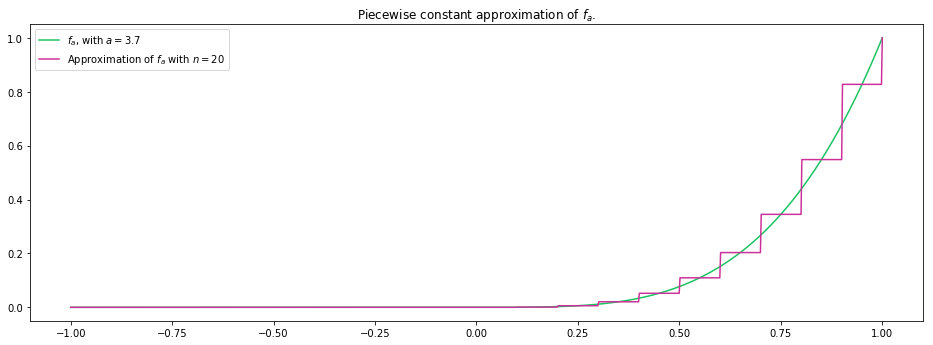

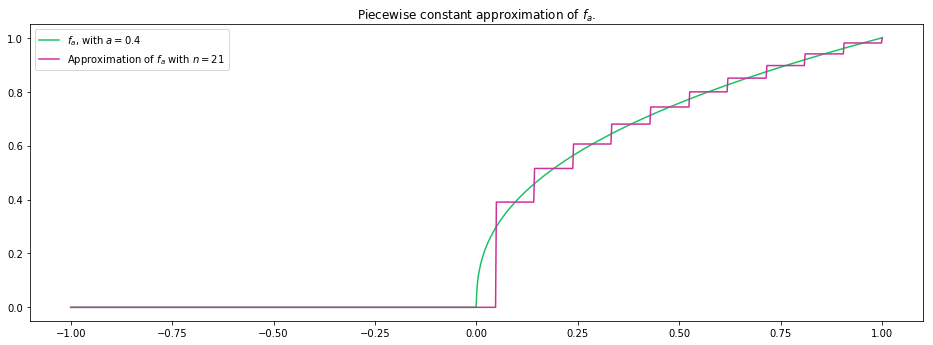

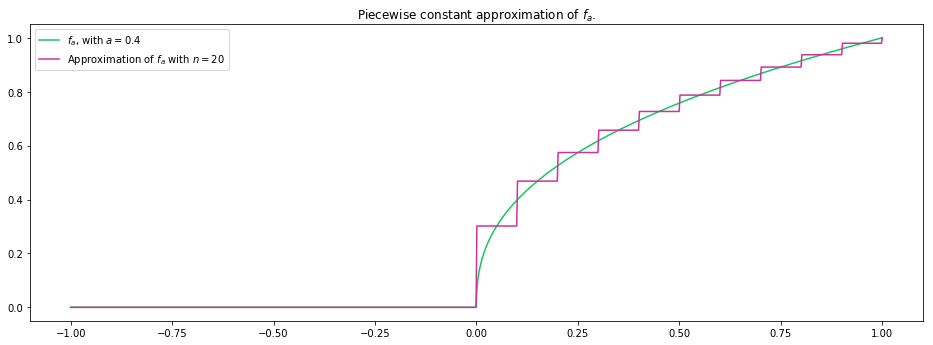

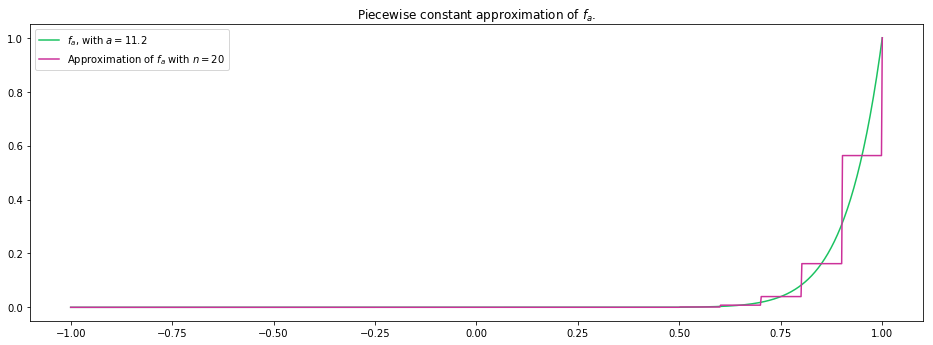

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mplt
from functools import partial
import warnings
warnings.filterwarnings("ignore",category=mplt.cbook.mplDeprecation) #filtering some matplotlib warning


colors = ['#224647', '#FF3F62', '#1BC261', '#CC319A', '#009599']

def f(a,x):
    # This is the function f_a, a parameter
    return 0 if (x <= 0) else pow(x,a)

def pieceConst(n, f, x):
    # This function returns a function that approximates f, with piecewise constant functions on n uniform intervals of [-1,1]
    if x == 1: return 1 # any power of 1 is 1
    k = np.floor((x+1)*n/2) # x is in the k-th interval from the left
    return f((2*k+1)/n-1) # f of midpoint

#Plotting two examples
for (a,n) in [(3.7, 20), (0.4, 21), (0.4, 20), (11.2, 20)]:
    i=2
    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(211)
    x = np.linspace(-1,1, 1000)
    fa = partial(f,a)
    y = list(map(fa, x))
    ax1.plot(x,y, colors[i], label = '$f_a$, with $a=%.1f$'%(a))
    appfa = partial(pieceConst, n, fa)
    y = list(map(appfa, x))
    ax1.plot(x,y, colors[i+1], label = 'Approximation of $f_a$ with $n=%d$'%(n))
    ax1.set_title(r'Piecewise constant approximation of $f_a$.')
    plt.legend(loc='upper left')
plt.show()

As for the error approximation, we note that the maximum errors are at the boundaries of the interval; namely in the rightmost interval for $a\geq 1$, and in the interval after 0 for $a<1$.

Looking at the second and third plots, we see a difference with respect to teh parity of $n$. If $n$ is even, the highest error is at $x=0$, since the approximation changes there. It is equal to $f(m) -f(0) = f(m)$ where $m = \frac{1}{n}$, the midpoint of the interval right of 0. If $n$ is odd, the highest error is not at $x=0$, because 0 is the midpoint of an interval. Hence, it is in the right boundary point of the interval containing 0, which is at $\frac{1}{n}$. Hence, in both cases, we have error $f(\frac{1}{n})$.



We plot these errors as $n$ grows for different values of $a$ around 1. We observe that it indeed behaves like $n^{-r}$ for some $r$. We only see the assymptotic behavious in our graph because the scale makes the small values of $n$ less visible.

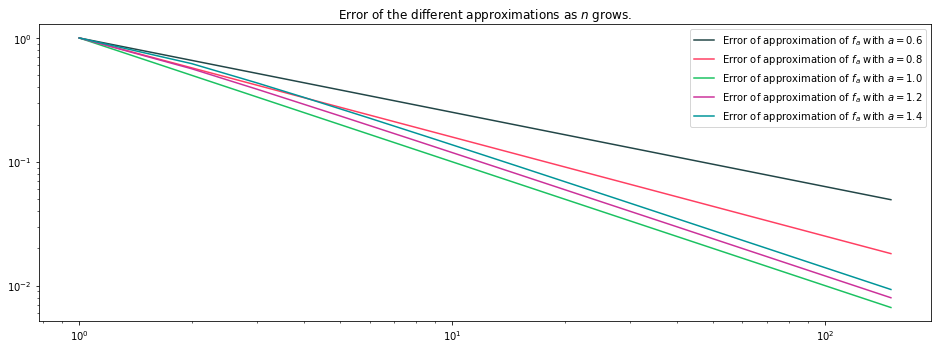

In [118]:
def err(f,a,n):
    # this function computes the error as described above
    return 1-f(1-1/n) if a >= 1 else f(1/n)

n = range(1,151)
val_A = [0.6,0.8,1,1.2, 1.4]

fig = plt.figure(figsize=(16,12))

for i in range(len(val_A)):
    fa = partial(f, val_A[i])
    ax2 = fig.add_subplot(211)
    errf = partial(err, fa, val_A[i])
    errors = list(map(errf, n))
    ax2.set_yscale('log')
    ax2.set_xscale('log')
    ax2.plot(n,errors,colors[i], label = 'Error of approximation of $f_a$ with $a=%.1f$'%(val_A[i]))
    ax2.set_title(r'Error of the different approximations as $n$ grows.')
    plt.legend(loc='upper right')
plt.show()


We confirm that the error grows like $n^{-r}$ for some $r$ that grows with the regularity of the function. This is because for values of $a$ closer to 0 or far from 1, the curves go down slowly and for values close to 1, the curves go down fast. The curves are very nice, so we conclude that the asymptotic regime starts very early. By looking at different curves for different values of $a$, we guess the relation between $r$ and $a$ is $r(a) = a$ for $a &lt; 1$ and it is $r(a) = 1$ for $a \geq 1$. However, we observe that for $a \geq 1$ and $a$ far from 1, the curve is shifted upward compared to $a=1$ until large values for $n$.

Theoretically, we make sense of this by the following argument. Let $\tilde{f}$ be the approximation. Then, since $f_a \sim \tilde{f}_a(x) = f_a(c)$, $\forall x\in(c-(2n)^{-1},c+(2n)^{-1})$. The Taylor expansion is:

$$f(x) = f(c) + f'(c)(x-c) + O((x-c)^{-2})$$

Thus 

$$f(x) - \tilde{f}(x) \le f'(c)n^{-1} + O(n^{-2}) = O(n^{-1})$$

Hence, our error cannot be better than $O(n^{-1})$, explaining that the rate of convergence does not increase for $a>1$. For $a<1$, $f_a \in C^{0,a}$. Hence, by Jackson's inequality 

$$E_nf\lesssim n^{-a}$$

giving a theoretical reason for our results.

# 3. Piecewise linear approximation of $f_a$

Similar to the trapezoidal rule, we approximate $f_a$ in each interval $[x_i, x_{i+1}]$ with a line connecting $f_a(x_{i})$ with $f_a(x_{i+1})$. We plot the same examples as with the piecewise constant.

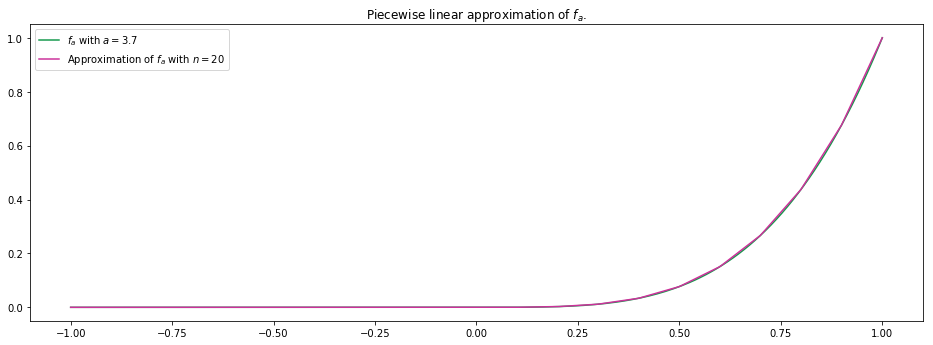

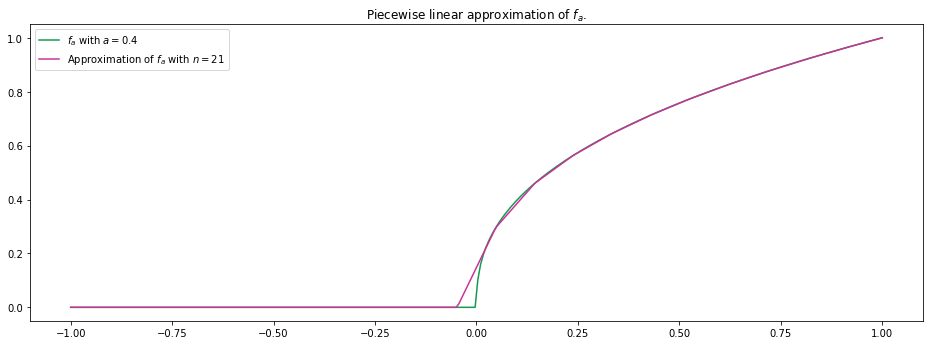

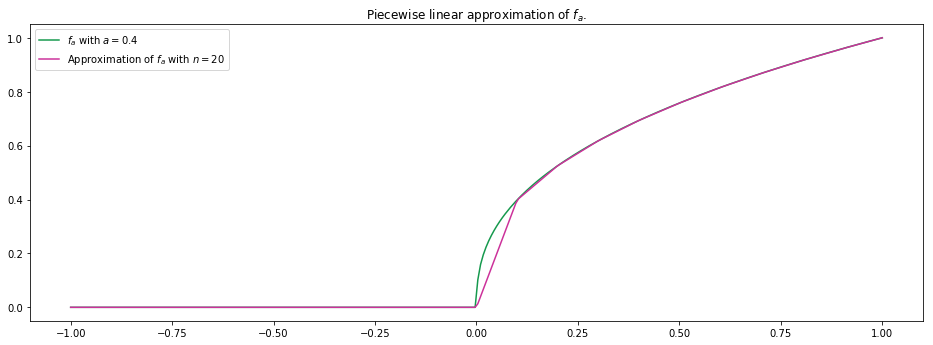

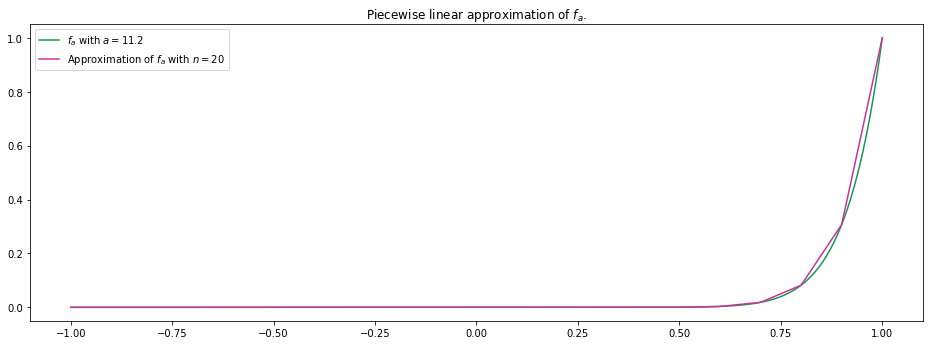

In [68]:
def pieceLin(n, f, x):
    # This function returns a function that approximates f, with piecewise constant functions on n uniform intervals of [-1,1]
    if x == 1: return 1 # # any power of 1 is 1
    k = np.floor((x+1)*n/2) # x is in the k-th interval from the left
    low, up = 2*k/n-1, 2*(k+1)/n-1 #boundary points of interval
    slope = (f(up) - f(low))*n/2 # getting slope
    y_inter = f(low) - slope*low 
    return slope*x+y_inter # f of the midpoint

#Drawing two examples
for (a,n) in [(3.7, 20), (0.4, 21), (0.4, 20), (11.2, 20)]:
    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(211)
    x = np.linspace(-1,1, 300)
    fa = partial(f,a)
    y = list(map(fa, x))
    ax1.plot(x,y,colors[2], label = '$f_a$ with $a=%.1f$'%(a))
    appfa = partial(pieceLin, n, fa)
    y = list(map(appfa, x))
    ax1.plot(x,y,colors[3], label = 'Approximation of $f_a$ with $n=%d$'%(n))
    ax1.set_title(r'Piecewise linear approximation of $f_a$.')
    plt.legend(loc='upper left')
    plt.show()

As there is no clear simple way to find the error, we use some sample points, and maximize over those.

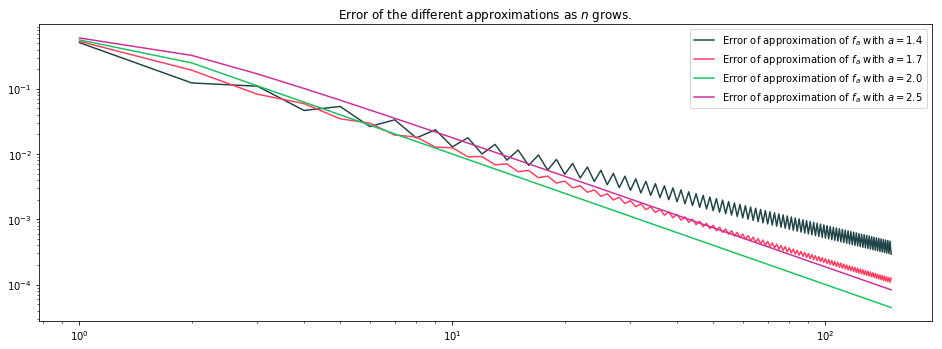

In [109]:
def unifNorm(f1, f2, low = -1, up = 1, numPoints = 10000):
    # approximates max norm of f1 and f2
    return max([abs(f1(p) - f2(p)) for p in np.linspace(low, up, numPoints)])

def errLin(f,n):
    appf = partial(pieceLin, n, f)
    return unifNorm(f, appf)

fig = plt.figure(figsize=(16,12))
n = range(1,151)
val_A = [1.4,1.7,2,2.5]
for i in range(len(val_A)):
    fa = partial(f, val_A[i])
    errf = partial(errLin, fa)
    errors = list(map(errf, n))
    #ax1.set_ylim([0.001,0.1])
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1 = fig.add_subplot(211)
    ax1.plot(n,errors,colors[i], label = 'Error of approximation of $f_a$ with $a=%.1f$'%(val_A[i]))

ax1.set_title(r'Error of the different approximations as $n$ grows.')
plt.legend(loc='upper right')
plt.show()

Again, we confirm that the error grows like $n^{-r}$ for some $r$. We see that all the curves have the same rate of convergence which is around $r = 2$. The curves are less regular because for an odd number of intervals, 0 becomes the middle of an interval, so we have to approximate a big jump near 0 with a linear curve and we get more error. Nevertheless, the asymptotic behaviour is still observed. Compared to the piecewise constant approximations, we have a higher rate of convergence, meaning that linear curves are better at approximating the function than constant functions (which is obvious because the space of linear functions includes the space of constant functions), and we have a higher degree of exactness here.

Theoretically, we make sense of this by the following argument. Let $\tilde{f}$ be the approximation. Then

$$\tilde{f}_a(x) = \frac{f_a(c+1/n)-f_a(c)}{1/n}(x-c)+f(c)$$

, $\forall x\in(c,c+1/n)$. Then, Taylor expansion: 

$$f(x) = f(c) + f'(c)(x-c) + O(n^{-2})$$

By the definition of the derivative at a point, we use the estimate

$$\frac{f_a(c+1/n)-f_a(c)}{1/n} \approx f_a^{'}(c)$$

Hence

$$f(x) - \tilde{f}(x) = O(n^{-2})$$

Hence, our error cannot be better than $O(n^{-2})$. For $a<1$, $f_a \in C^{0,a}$. Again, by Jackson the best approximation error is approximately less than $n^{-a}$. For $a\in(1,2)$, $f_a \in C^{1,\{a\}}$, so we expect $E_nf\lesssim n^{-1-\{a\}} = n^{-a}$. 

# 4. Bernstein polynomial approximation of $f_a$

Let $n$ be the order of the approximation, the Bernstein polynomials are 

$$ b_{n,k}(x) = \binom{n}{k}(1-x)^{n-k}x^k \mbox{ for $k = 0,\dots, n$.}$$

Then, the approximation of a function $f$ is $$ p_n(x) = \sum_{k=0}^n f(\frac{k}{n})b_{n,k}(x).$$ This setting works to approximate in the interval $[0,1]$, but since we are working in $[-1,1]$, we need to do to the following scaling $x = \frac{x+1}{2}$.

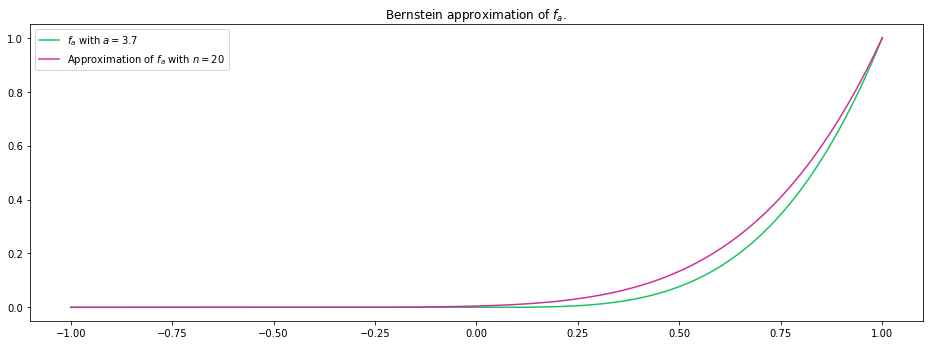

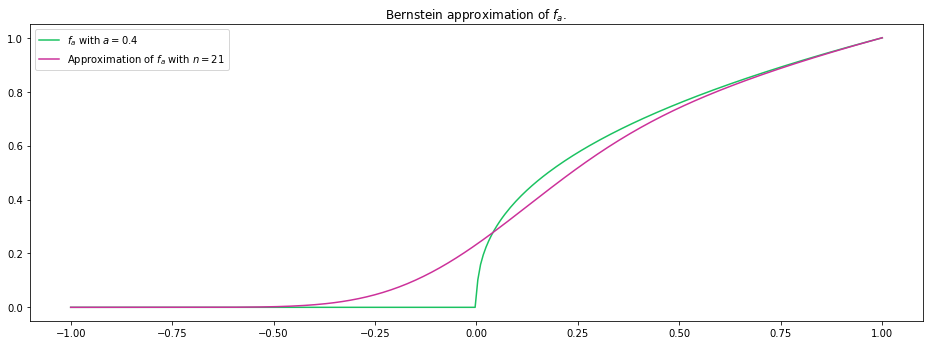

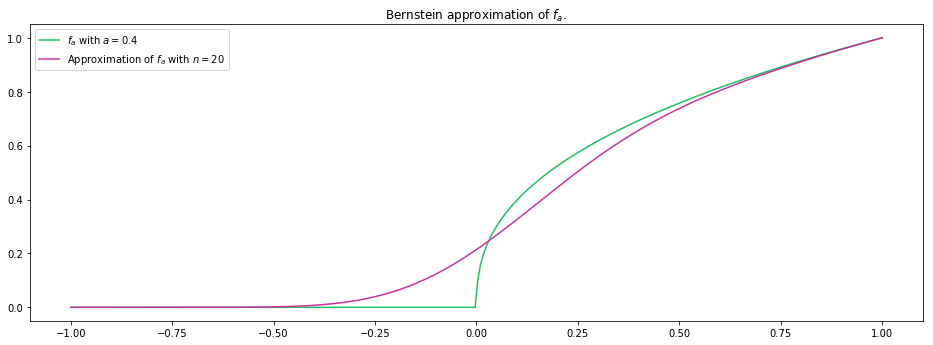

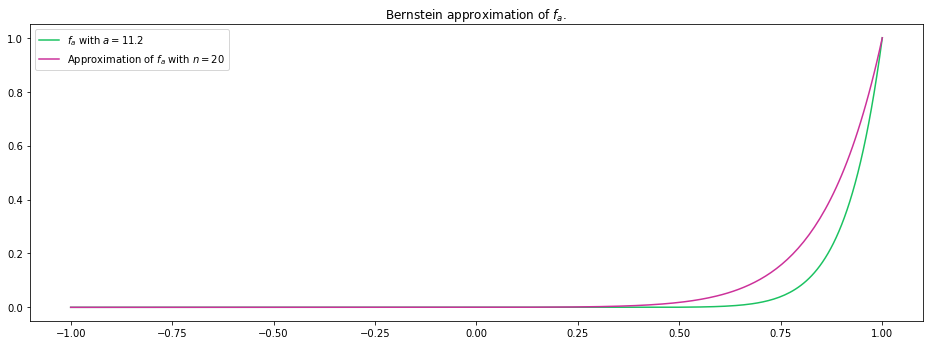

In [91]:
from scipy.special import binom
def bernPol(n,x,k):
    #This computes b_{n,k}(x)
    return binom(n,k)*pow(1-x,n-k)*pow(x,k)

def approxBern(n, f, x):
    # This computes the approximation of f at x in [-1,1]
    # with n-th order bernstein polynomials
    bern = partial(bernPol, n, (x+1)/2) #This is nth order bernstein polynomial at x with k as parameter
    return sum([f(-1+2*k/n)*bern(k) for k in range(n+1)])

#Drawing two examples
for (a,n) in [(3.7, 20), (0.4, 21), (0.4, 20), (11.2, 20)]:
    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(211)
    x = np.linspace(-1,1, 300)
    fa = partial(f,a)
    y = list(map(fa, x))
    ax1.plot(x,y,colors[2], label = '$f_a$ with $a=%.1f$'%(a))
    appfa = partial(approxBern, n, fa)
    y = list(map(appfa, x))
    ax1.plot(x,y,colors[3], label = 'Approximation of $f_a$ with $n=%d$'%(n))
    ax1.set_title(r'Bernstein approximation of $f_a$.')
    plt.legend(loc='upper left')
    plt.show()

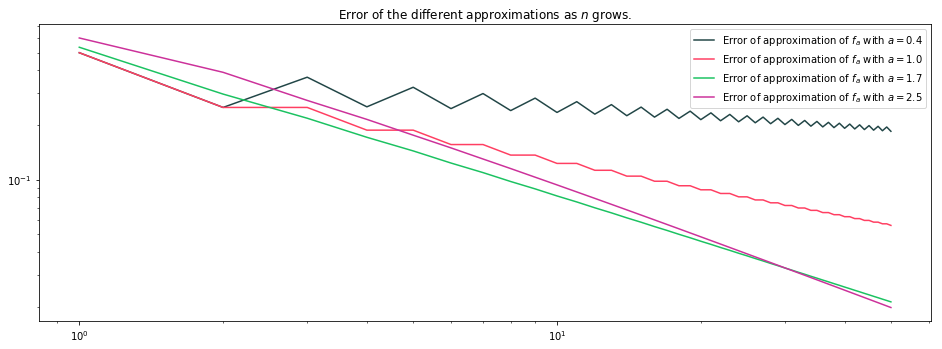

In [114]:
def errBern(f,n):
    # this function computes the error as described above
    appf = partial(approxBern, n, f)
    return unifNorm(f, appf)

fig = plt.figure(figsize=(16,12))
n = range(1,51)
val_A = [0.4,1,1.7,2.5]
for i in range(len(val_A)):
    fa = partial(f, val_A[i])
    errf = partial(errBern, fa)
    errors = list(map(errf, n))
    ax1 = fig.add_subplot(211)
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1.plot(n,errors,colors[i], label = 'Error of approximation of $f_a$ with $a=%.1f$'%(val_A[i]))

ax1.set_title(r'Error of the different approximations as $n$ grows.')
plt.legend(loc='upper right')
plt.show()

Again, we confirm that the error grows like $n^{-r}$ for some $r$. This time, not all the curves have the same rate of convergence. For $a \leq 1$, we have a sawtooth behaviour probably related to the parity of the degree of the polynomial that changes its behaviour. The rate of convergence for $a =0.4$ is $r \approx 1/3$, for $a=1$ we get $r\approx 1/2$, for $a =1.7$ and $a =2.5$, we get $r \approx 1$. We get worse convergence than for linear and constants, meaning it is more practical to approximate with piecewise functions than polynomials on a whole interval.

This is in lign with the theory, which states that $f\in C^{0,\alpha}$, $\left| \left| f-B_nf \right| \right| \lesssim n^{-\alpha/2}$, which explains our observations for $a<2$

# 5. Chebyshev interpolation of $f_a$

We use Lagrange interpolation on Chebyshev nodes to approximate $f_a$.

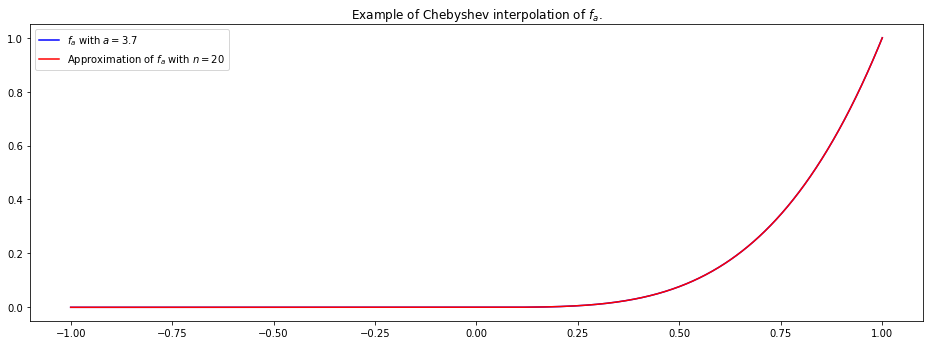

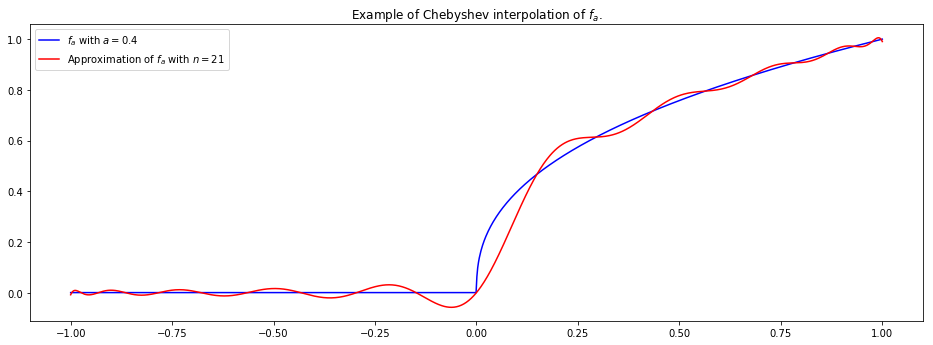

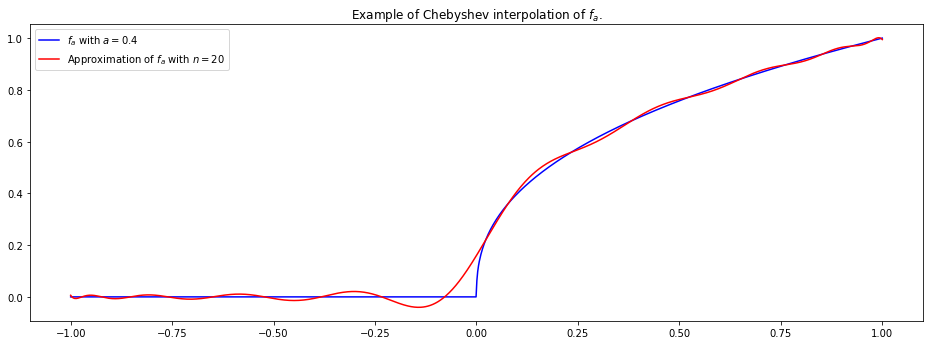

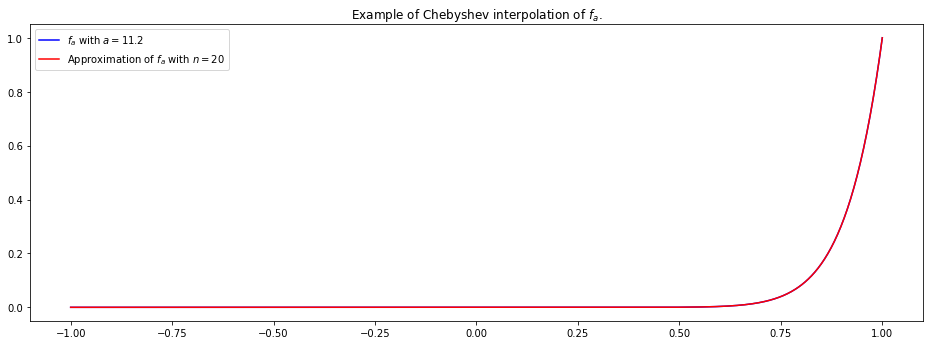

In [94]:
def evalPoly(a, x):
    # evaluates a polynomial defined with its coefficients at x
    return sum([a[i]*pow(x,i) for i in range(len(a))])

def lagrange(x, y):
    # Uses the Vandermonde matrix to find the coefficients
    # a_i of the Lagrange polynomial for the interpolation problem
    # with data x and y.
    vmonde = np.zeros((len(x), len(x))) # initialize matrix with zeros
    for i in range(len(vmonde)): 
        for j in range(len(vmonde)):
            vmonde[i,j] = pow(x[i], j) #put x_i^j in (i,j) coordinate
    return np.linalg.solve(vmonde, y) # solve the system Ma = y returning the coefficients a

def cheb(n):
    # gives the Chebyshev nodes.
    return [np.cos((2*i-1)*np.pi/(2*n)) for i in range(1,n+1)]

#Drawing two examples
for (a,n) in [(3.7, 20), (0.4, 21), (0.4, 20), (11.2, 20)]:
    fa = partial(f,a)
    # getting the lagrange Polynomial for fa
    nodes = cheb(n)
    coeffs = lagrange(nodes,list(map(fa,nodes)))
    appfa = partial(evalPoly, coeffs)
    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(211)
    x = np.linspace(-1,1, 1000)
    y = list(map(fa, x))
    ax1.plot(x,y,'b', label = '$f_a$ with $a=%.1f$'%(a))
    y = list(map(appfa, x))
    ax1.plot(x,y,'r', label = 'Approximation of $f_a$ with $n=%d$'%(n))
    ax1.set_title(r'Example of Chebyshev interpolation of $f_a$.')
    plt.legend(loc='upper left')
    plt.show()


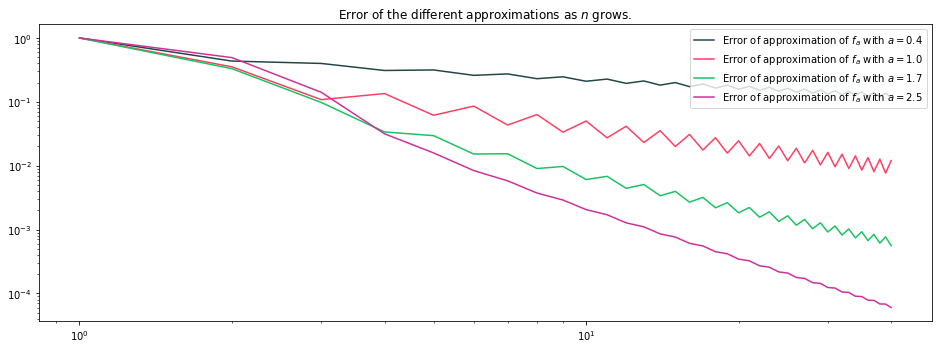

In [110]:
def errCheb(f,n):
    # this function computes the error as described above
    # getting the lagrange Polynomial for fa
    nodes = cheb(n)
    coeffs = lagrange(nodes,list(map(f,nodes)))
    appf = partial(evalPoly, coeffs)
    return unifNorm(f, appf, -1,1, 1000)

fig = plt.figure(figsize=(16,12))
n = range(1,41)
val_A = [0.4,1,1.7,2.5]
for i in range(len(val_A)):
    fa = partial(f, val_A[i])
    errf = partial(errCheb, fa)
    errors = list(map(errf, n))
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    ax1 = fig.add_subplot(211)
    ax1.plot(n,errors,colors[i], label = 'Error of approximation of $f_a$ with $a=%.1f$'%(val_A[i]))

ax1.set_title(r'Error of the different approximations as $n$ grows.')
plt.legend(loc='upper right')
plt.show()

Again, we confirm that the error grows like $n^{-r}$ for some $r$. This time, not all the curves have the same rate of convergence. For $a = 0.4$, we have $r \approx 0.6$, for $a = 1$, we have $r \approx 1.8$, for $a = 1.7$ and $a= 2.5$, we have $r\approx 2.5$. The asymptotic regime starts early just like in Q1 although the curves have some kind of sawtooth shape, this clearly comes from the fact that odd and even degree polynomials behave differently. Compared to the piecewise constant approximations, we have a higher rate of convergence but when $a$ is sligthly below 1. However, linear approximations have similar rates of convergence for the ranges we observe. We get better convergence than for Bernstein polynomials, but we still see that piecewise functions are better to appoximate our function especially if we consider that it takes more time to compute the Chebyshev interpolation for large values of $n$.

Applying the same reasoning as in previous parts, we have for some $\xi$

$$f(x)-L_n(x) = \frac{(x-x_0)...(x-x_n)}{n!}f^{(n+1)}(\xi)$$ 

where, by definition, Chebyshev nodes minimize the product $(x-x_0)...(x-x_n)$. Hence, the error is "freer" then in previous cases. Furthermore

$$\left| \left| f - L_nf \right| \right| \le C \frac{\log n}{n^a} $$

explaining the above somewhat slower slope in the error versus $n$ graphs.